In [163]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [164]:
train_data=pd.read_csv('../data/kaggle_house_pred_train.csv')

### 查看数据基本信息

In [165]:
# train_data.info()

- SalePrice: 房产销售价格，以美元计价。所要预测的目标变量
- MSSubClass: Identifies the type of dwelling involved in the sale 住所类型
- MSZoning: The general zoning classification 区域分类
- LotFrontage: Linear feet of street connected to property 房子同街道之间的距离
- LotArea: Lot size in square feet 建筑面积
- Street: Type of road access 主路的路面类型
- Alley: Type of alley access 小道的路面类型
- LotShape: General shape of property 房屋外形
- LandContour: Flatness of the property 平整度
- Utilities: Type of utilities available 配套公用设施类型
- LotConfig: Lot configuration 配置
- LandSlope: Slope of property 土地坡度
- Neighborhood: Physical locations within Ames city limits 房屋在埃姆斯市的位置
- Condition1: Proximity to main road or railroad 附近交通情况
- Condition2: Proximity to main road or railroad (if a second is present) 附近交通情况（如果同时满足两种情况）
- BldgType: Type of dwelling 住宅类型
- HouseStyle: Style of dwelling 房屋的层数
- OverallQual: Overall material and finish quality 完工质量和材料
- OverallCond: Overall condition rating 整体条件等级
- YearBuilt: Original construction date 建造年份
- YearRemodAdd: Remodel date 翻修年份
- RoofStyle: Type of roof 屋顶类型
- RoofMatl: Roof material 屋顶材料
- Exterior1st: Exterior covering on house 外立面材料
- Exterior2nd: Exterior covering on house (if more than one material) 外立面材料2
- MasVnrType: Masonry veneer type 装饰石材类型
- MasVnrArea: Masonry veneer area in square feet 装饰石材面积
- ExterQual: Exterior material quality 外立面材料质量
- ExterCond: Present condition of the material on the exterior 外立面材料外观情况
- Foundation: Type of foundation 房屋结构类型
- BsmtQual: Height of the basement 评估地下室层高情况
- BsmtCond: General condition of the basement 地下室总体情况
- BsmtExposure: Walkout or garden level basement walls 地下室出口或者花园层的墙面
- BsmtFinType1: Quality of basement finished area 地下室区域质量
- BsmtFinSF1: Type 1 finished square feet Type 1完工面积
- BsmtFinType2: Quality of second finished area (if present) 二次完工面积质量（如果有）
- BsmtFinSF2: Type 2 finished square feet Type 2完工面积
- BsmtUnfSF: Unfinished square feet of basement area 地下室区域未完工面积
- TotalBsmtSF: Total square feet of basement area 地下室总体面积
- Heating: Type of heating 采暖类型
- HeatingQC: Heating quality and condition 采暖质量和条件
- CentralAir: Central air conditioning 中央空调系统
- Electrical: Electrical system 电力系统
- 1stFlrSF: First Floor square feet 第一层面积
- 2ndFlrSF: Second floor square feet 第二层面积
- LowQualFinSF: Low quality finished square feet (all floors) 低质量完工面积
- GrLivArea: Above grade (ground) living area square feet 地面以上部分起居面积
- BsmtFullBath: Basement full bathrooms 地下室全浴室数量
- BsmtHalfBath: Basement half bathrooms 地下室半浴室数量
- FullBath: Full bathrooms above grade 地面以上全浴室数量
- HalfBath: Half baths above grade 地面以上半浴室数量
- Bedroom: Number of bedrooms above basement level 地面以上卧室数量
- KitchenAbvGr: Number of kitchens 厨房数量
- KitchenQual: Kitchen quality 厨房质量
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 总房间数（不含浴室和地下部分）
- Functional: Home functionality rating 功能性评级
- Fireplaces: Number of fireplaces 壁炉数量
- FireplaceQu: Fireplace quality 壁炉质量
- GarageType: Garage location 车库位置
- GarageYrBlt: Year garage was built 车库建造时间
- GarageFinish: Interior finish of the garage 车库内饰
- GarageCars: Size of garage in car capacity 车壳大小以停车数量表示
- GarageArea: Size of garage in square feet 车库面积
- GarageQual: Garage quality 车库质量
- GarageCond: Garage condition 车库条件
- PavedDrive: Paved driveway 车道铺砌情况
- WoodDeckSF: Wood deck area in square feet 实木地板面积
- OpenPorchSF: Open porch area in square feet 开放式门廊面积
- EnclosedPorch: Enclosed porch area in square feet 封闭式门廊面积
- 3SsnPorch: Three season porch area in square feet 时令门廊面积
- ScreenPorch: Screen porch area in square feet 屏风门廊面积
- PoolArea: Pool area in square feet 游泳池面积
- PoolQC: Pool quality 游泳池质量
- Fence: Fence quality 围栏质量
- MiscFeature: Miscellaneous feature not covered in other categories 其它条件中未包含部分的特性
- MiscVal: $Value of miscellaneous feature 杂项部分价值
- MoSold: Month Sold 卖出月份
- YrSold: Year Sold 卖出年份
- SaleType: Type of sale 出售类型
- SaleCondition: Condition of sale 出售条件

### 查看目标变量分布

/var/folders/qq/fj95mhrs0n5fwjr1vzrrq_5r0000gn/T/ipykernel_2745/2575882355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


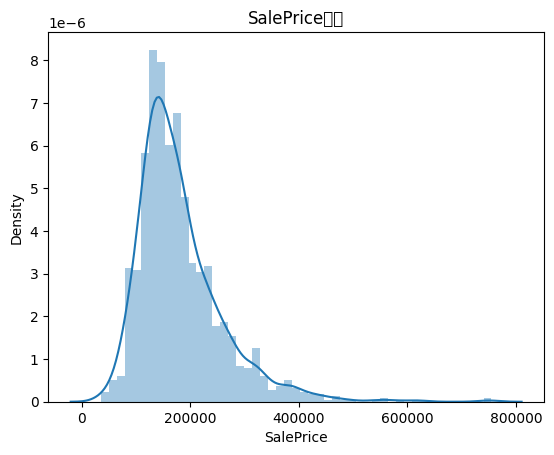

In [166]:
plt.figure()
sns.distplot(train_data['SalePrice'])
plt.title('SalePrice分布')
plt.show()

### 计算峰度和偏度

- Kurtosis=0 与正态分布的陡缓程度相同
- Kurtosis>0 比正态分布的高峰陡峭——尖顶峰
- Kurtosis<0 比正态分布的高峰平缓——平顶峰
- Skewness=0 分布形态与正态分布偏度相同
- Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边
- Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边

In [167]:
print('峰度(Kurtosis): ', train_data['SalePrice'].kurt())
print('偏度(Skewness): ', train_data['SalePrice'].skew())

峰度(Kurtosis):  6.536281860064529
偏度(Skewness):  1.8828757597682129


### 查看定量变量分布

In [168]:
# 特征变量按照数据类型分成定量变量和定性变量
quantitative = [feature for feature in train_data.columns if train_data.dtypes[feature] != 'object'] # 定量变量
quantitative.remove('Id')
quantitative.remove('SalePrice')
print('定量变量')
print(quantitative)
qualitative = [feature for feature in train_data.columns if train_data.dtypes[feature] == 'object'] # 定性变量
print('定性变量')
print(qualitative)

定量变量
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
定性变量
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site

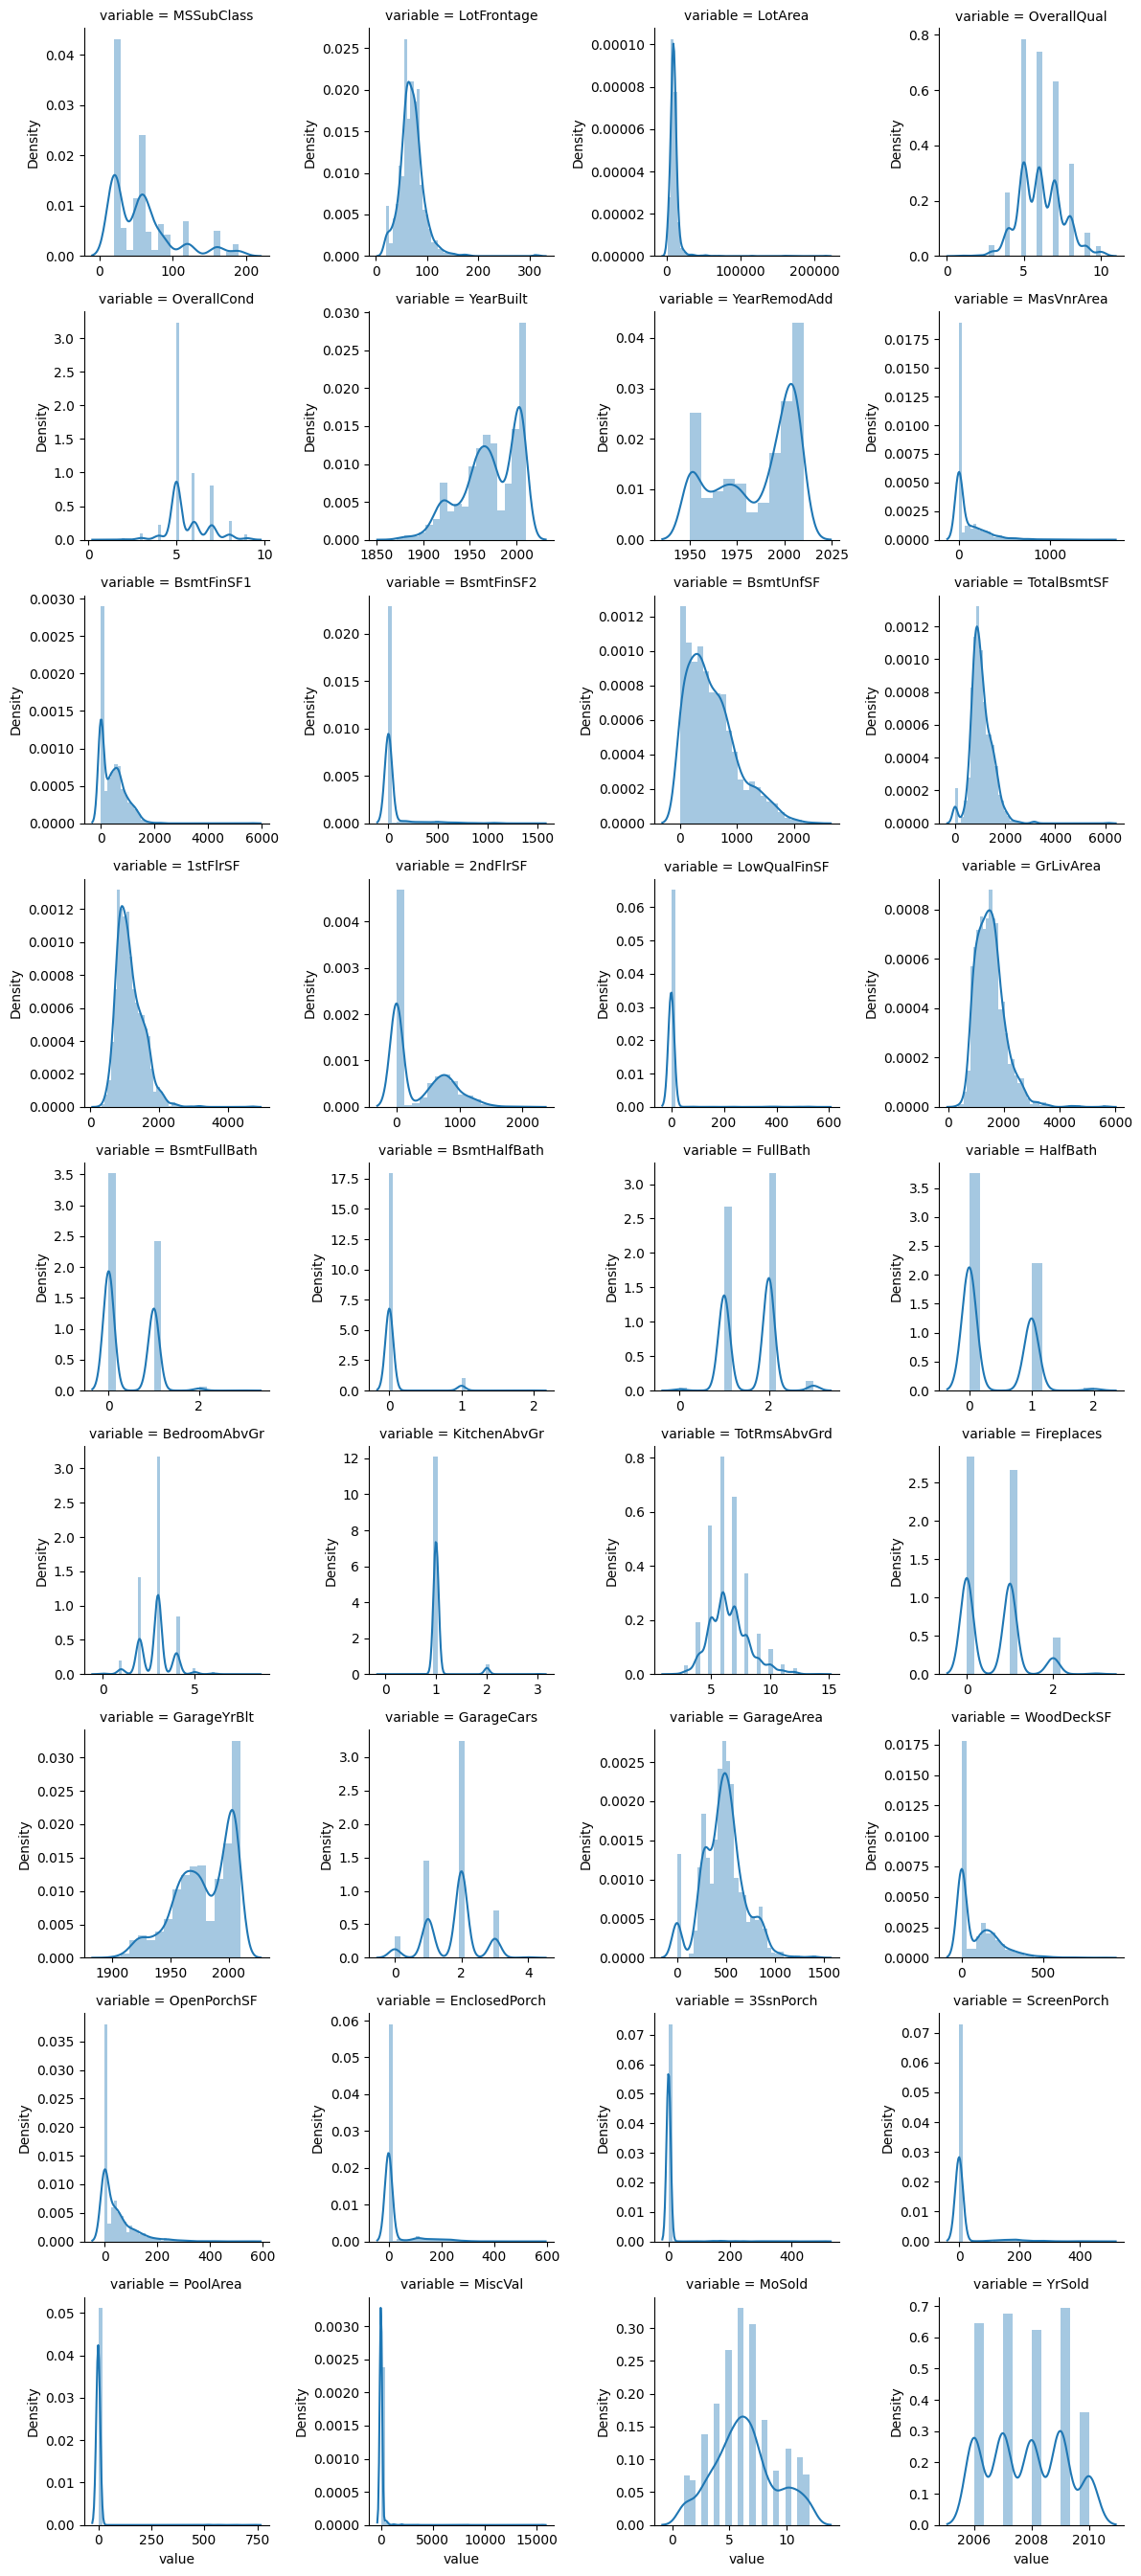

In [169]:
m_cont = pd.melt(train_data, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, 'value')

### 查看定量变量与目标变量的关系

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


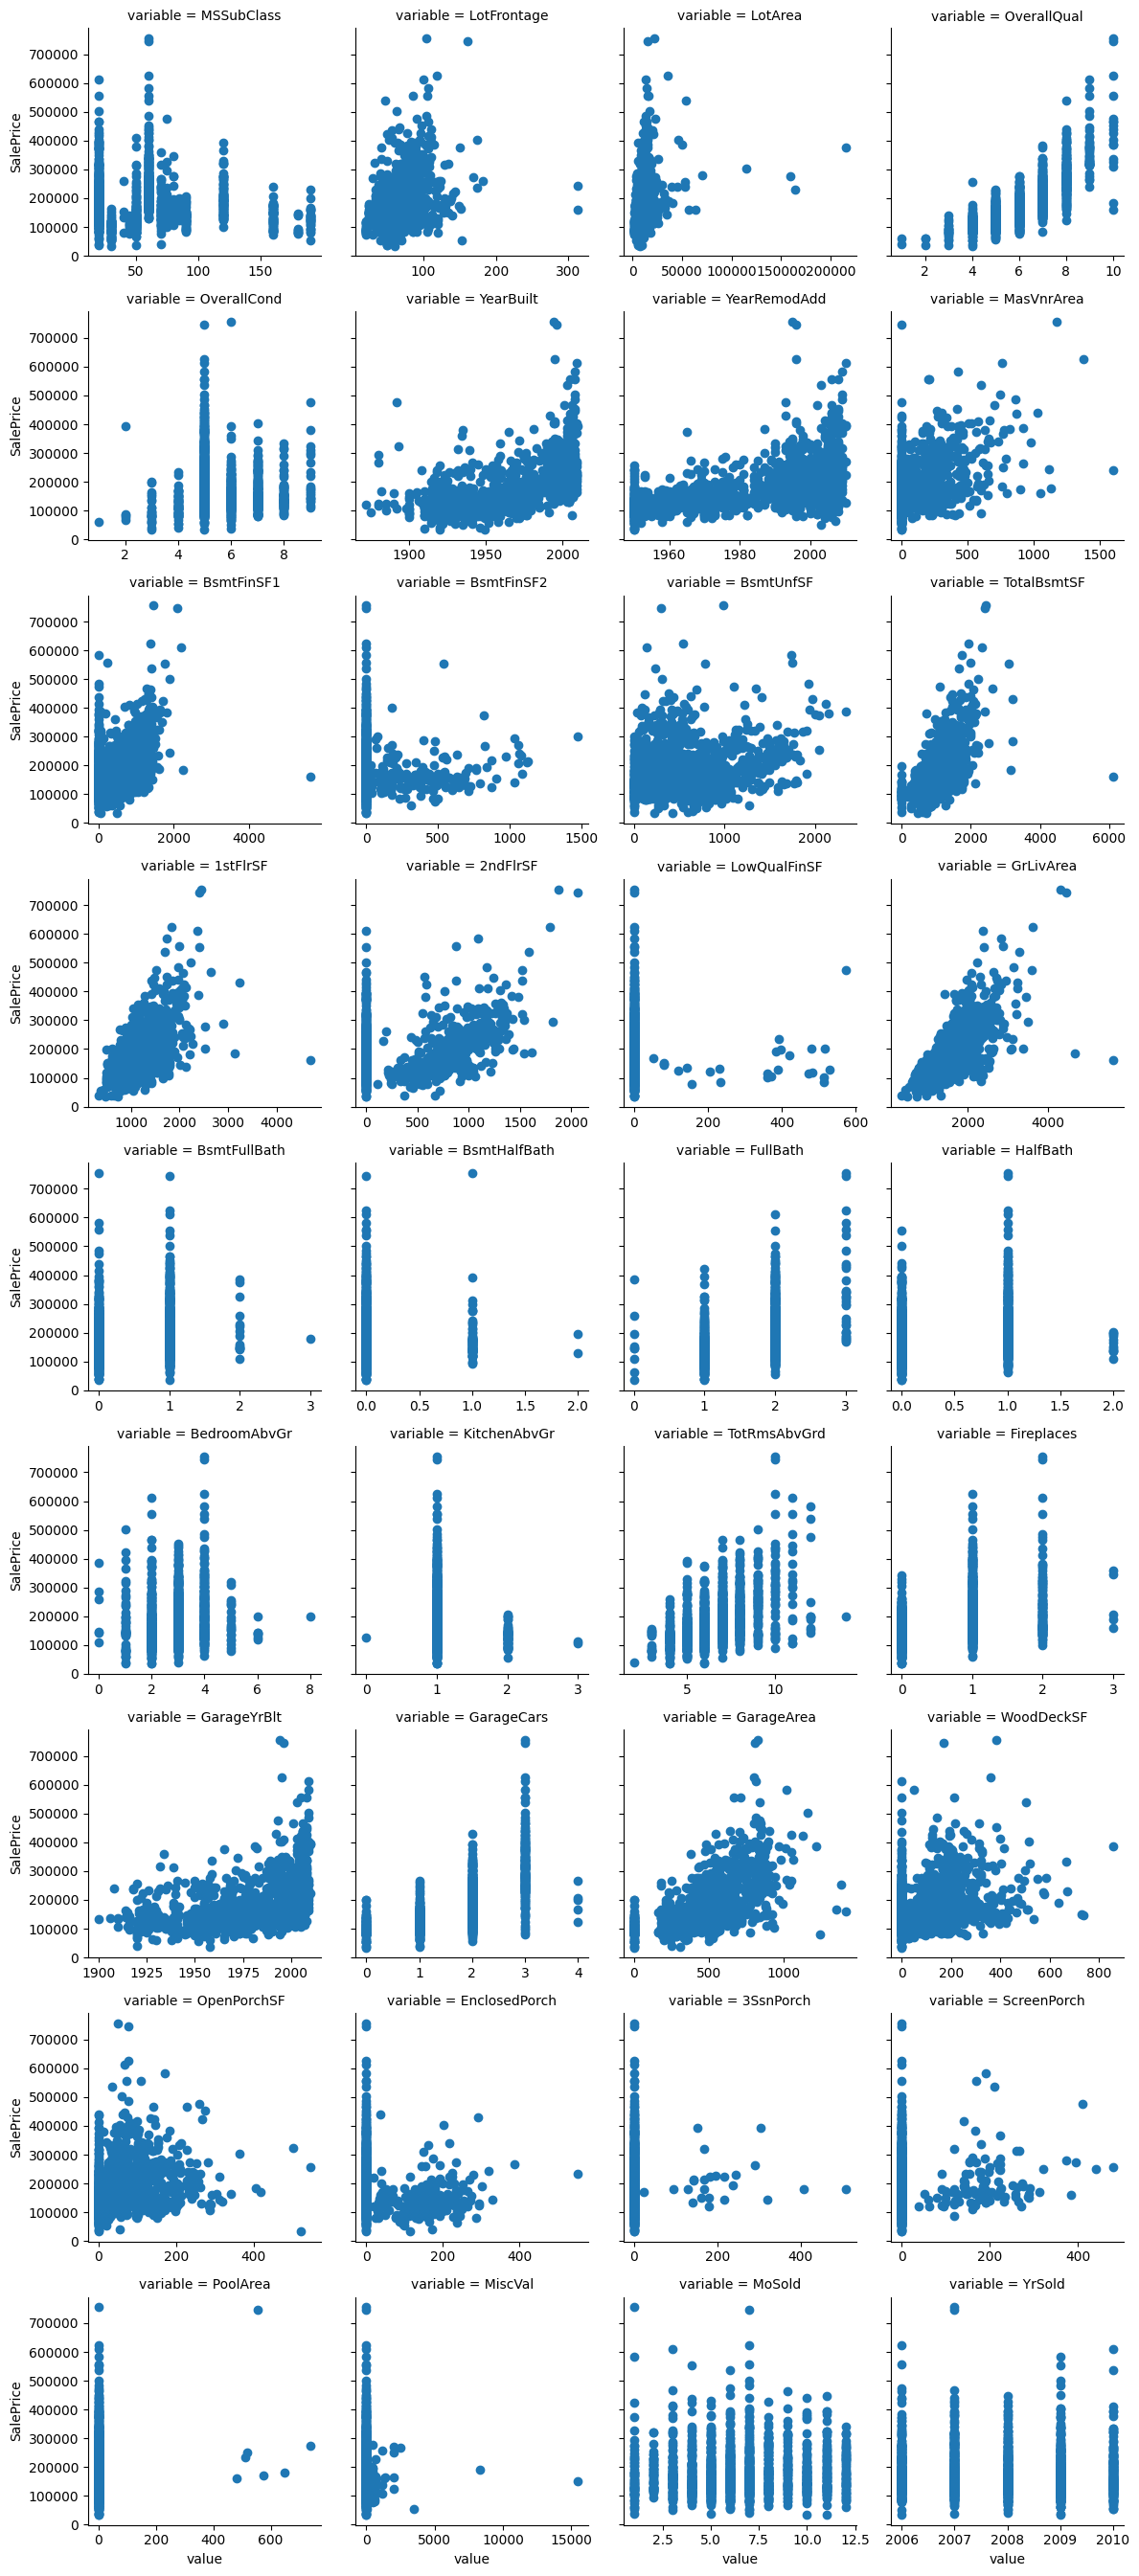

In [170]:
m_cont = pd.melt(train_data, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=True)
g.map(plt.scatter, 'value', 'SalePrice')

### 查看定性变量对目标变量的显著性影响程度

目标变量的显著性影响程度对机器学习建模有重要影响。这涉及到特征选择（feature selection）和特征工程（feature engineering）的过程。

特征选择是选择对目标变量具有显著影响的特征，以便在建模过程中仅使用最相关的特征。如果一个特征对目标变量的显著性影响较高，那么将其包含在模型中可能会提供更好的预测能力。

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


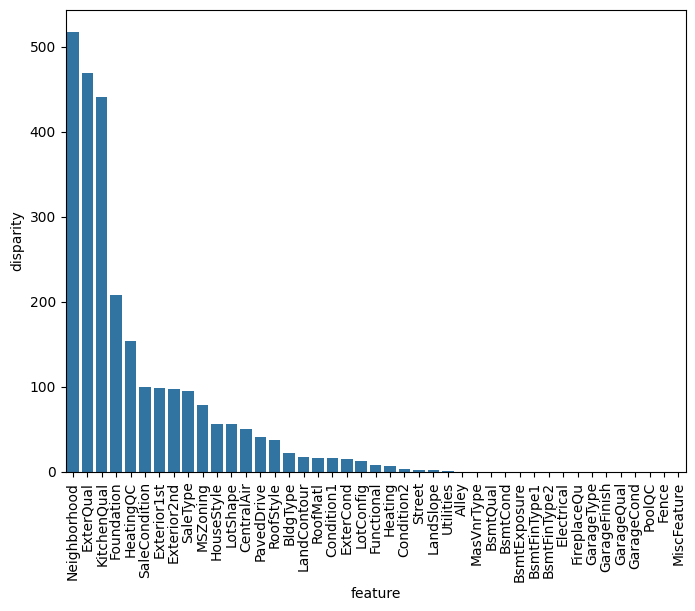

In [171]:
def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    p_vals = []
    for fea in qualitative:
        samples = []
        cls = frame[fea].unique() # 变量的类别值
        for c in cls:
            c_array = frame[frame[fea]==c]['SalePrice'].values
            samples.append(c_array)
        p_val = stats.f_oneway(*samples)[1] # 获得p值，p值越小，对SalePrice的显著性影响越大
        p_vals.append(p_val)
    anv['pval'] = p_vals
    return anv.sort_values('pval')
a = anova(train_data, qualitative)
a['disparity'] = np.log(1./a['pval'].values) # 对SalePrice的影响悬殊度
plt.figure(figsize=(8, 6))
sns.barplot(x='feature', y='disparity', data=a)
plt.xticks(rotation=90)
plt.show()

### 查看定性变量与目标变量的spearman相关系数

Spearman相关系数是一种用于衡量两个变量之间的单调关系的非参数统计指标。与皮尔逊相关系数不同，Spearman相关系数不要求变量之间的关系是线性的，而是可以捕捉到任何单调的关系，包括非线性的关系。

Spearman相关系数的取值范围为-1到1。以下是对Spearman相关系数取值的一般解释：

当Spearman相关系数为-1时，表示变量之间存在完全的负相关关系。即，当一个变量增加时，另一个变量会完全减小，并且变量之间的关系可以通过一个单调递减函数来描述。
当Spearman相关系数为0时，表示变量之间不存在单调关系。即，一个变量的值的变化并不意味着另一个变量的值会发生变化。
当Spearman相关系数为1时，表示变量之间存在完全的正相关关系。即，当一个变量增加时，另一个变量会完全增加，并且变量之间的关系可以通过一个单调递增函数来描述。
Spearman相关系数是基于变量的排序顺序进行计算的，而不是直接使用原始变量的值。对于定性变量（也称为分类变量），它们通常没有直接可比较的数值关系。例如，一个定性变量可能是颜色，有"红"、"绿"和"蓝"等等取值，这些取值之间没有明确的大小关系。因此，为了能够计算Spearman相关系数，我们需要将定性变量转换为数值表示。编码定性变量可以为每个不同的取值分配一个数值标签，使得不同的取值之间存在一种排序关系。常见的编码方法包括使用整数编码、独热编码（One-Hot Encoding）等。

In [172]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering['val']
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature)['SalePrice'].mean()
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = np.arange(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict() # 返回的数据样例{category1:1, category2:2, ...}

    # 对frame[feature]编码
    for category, code_value in ordering.items():
        frame.loc[frame[feature]==category, feature+'_E'] = code_value
qual_encoded = []
for qual in qualitative:
    encode(train_data, qual)
    qual_encoded.append(qual+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


###  计算特征变量与房价的spearman相关系数

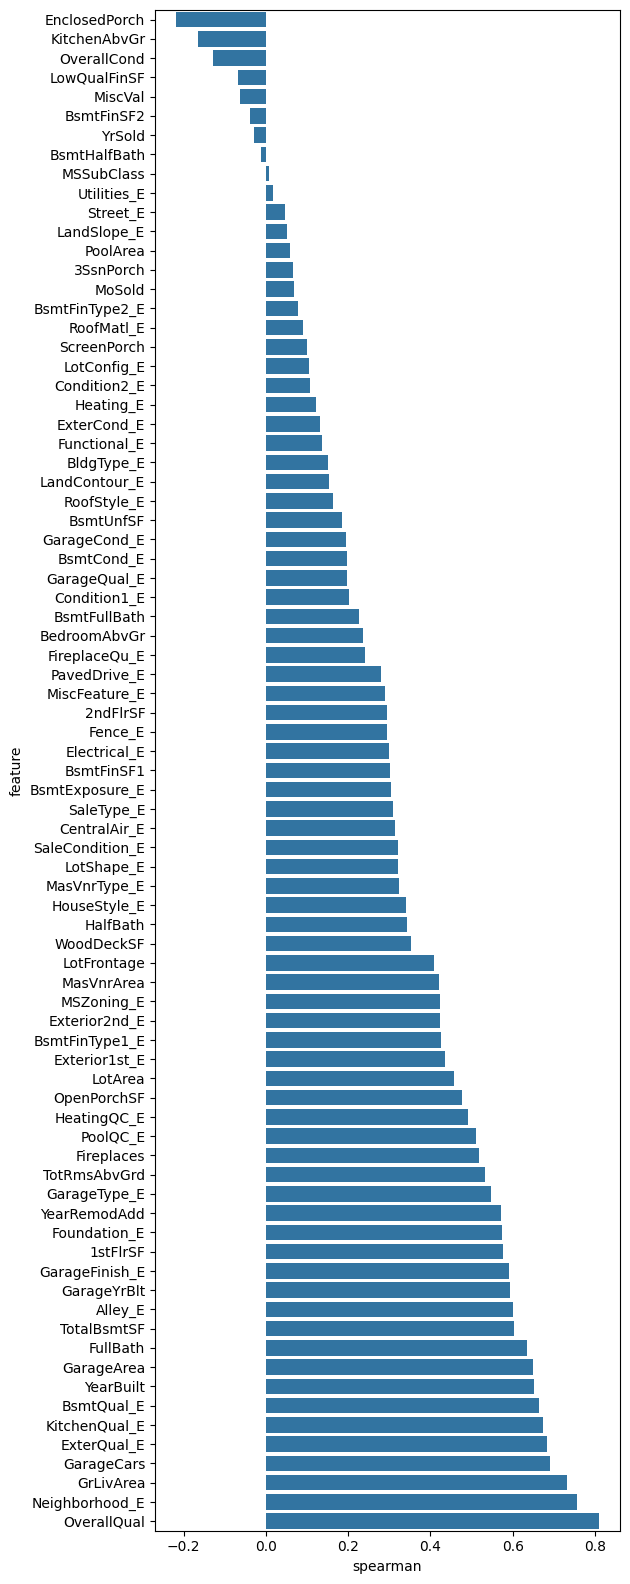

In [173]:
#  计算特征变量与房价的spearman相关系数
def spearman(frame, features):
    spr =  pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')

    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(x='spearman', y='feature', data=spr)
spearman(train_data, quantitative+qual_encoded)

## 四、数据预处理

### 1、数据处理

包括去除异常值、处理缺失数据、处理样本不平衡等。例如，缺失值可以通过填充均值、中位数或特定值来处理；异常值可以通过阈值法、IQR法等方法识别和处理。

### 异常值处理

查看异常值

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/h

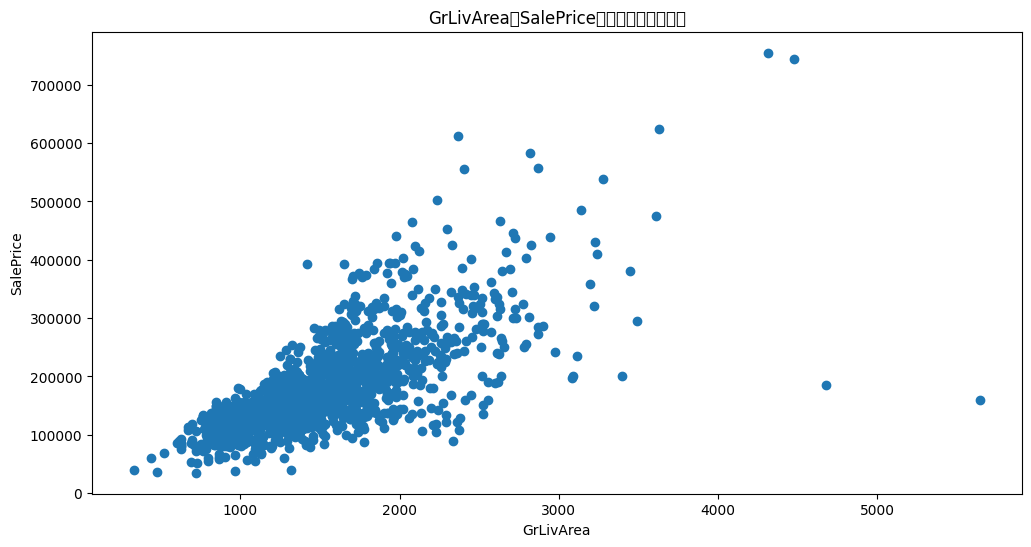

In [174]:
train = pd.read_csv('../data/kaggle_house_pred_train.csv')
test = pd.read_csv('../data/kaggle_house_pred_test.csv')
plt.figure(figsize=(12,6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea与SalePrice散点图，观察异常值')
# plt.grid(b=True, ls=':')
plt.show()

In [175]:
# 删除两个离群点
train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<200000)].index, inplace=True)
# 合并训练集和测试集，便于同时对两个数据集进行数据清洗和特征工程
full = pd.concat([train, test], axis=0, ignore_index=True)
train.shape, test.shape, full.shape

((1458, 81), (1459, 80), (2917, 81))

### 缺失值处理

查看每个特征的缺失情况

In [176]:
def audit_missing_values(df):  
    audit_result = {}  
    for col in df.columns:  
        count = df[col].isnull().sum()  
        ratio = count / len(df) if len(df) > 0 else 0  
        audit_result[col] = {'缺失数量': count, '缺失百分比': ratio}  
    return audit_result

audit_missing_values(full)

{'Id': {'缺失数量': 0, '缺失百分比': 0.0},
 'MSSubClass': {'缺失数量': 0, '缺失百分比': 0.0},
 'MSZoning': {'缺失数量': 4, '缺失百分比': 0.0013712718546451835},
 'LotFrontage': {'缺失数量': 486, '缺失百分比': 0.16660953033938977},
 'LotArea': {'缺失数量': 0, '缺失百分比': 0.0},
 'Street': {'缺失数量': 0, '缺失百分比': 0.0},
 'Alley': {'缺失数量': 2719, '缺失百分比': 0.9321220431950634},
 'LotShape': {'缺失数量': 0, '缺失百分比': 0.0},
 'LandContour': {'缺失数量': 0, '缺失百分比': 0.0},
 'Utilities': {'缺失数量': 2, '缺失百分比': 0.0006856359273225917},
 'LotConfig': {'缺失数量': 0, '缺失百分比': 0.0},
 'LandSlope': {'缺失数量': 0, '缺失百分比': 0.0},
 'Neighborhood': {'缺失数量': 0, '缺失百分比': 0.0},
 'Condition1': {'缺失数量': 0, '缺失百分比': 0.0},
 'Condition2': {'缺失数量': 0, '缺失百分比': 0.0},
 'BldgType': {'缺失数量': 0, '缺失百分比': 0.0},
 'HouseStyle': {'缺失数量': 0, '缺失百分比': 0.0},
 'OverallQual': {'缺失数量': 0, '缺失百分比': 0.0},
 'OverallCond': {'缺失数量': 0, '缺失百分比': 0.0},
 'YearBuilt': {'缺失数量': 0, '缺失百分比': 0.0},
 'YearRemodAdd': {'缺失数量': 0, '缺失百分比': 0.0},
 'RoofStyle': {'缺失数量': 0, '缺失百分比': 0.0},
 'RoofMatl': {'缺失数量': 0, '缺

**中位数填充**

房子同街道之间的距离，按照建筑面积分为10块，用每块的中位数填充

In [177]:
full['LotAreaCut'] = pd.qcut(full['LotArea'], 10)
full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].agg(['count', 'mean', 'median'])
full['LotFrontage'] = full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# 由于某些分组没有数据，因此未填补的缺失值单独利用LotAreaCut填充
full['LotFrontage'] = full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/opt/homebrew/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**None填充**

游泳池质量、车库质量、车库条件是类型特征，可以用None填充

In [178]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    full[col] = full[col].fillna('None')

**0填充**

装饰石材面积、地下室区域未完工面积缺失时可视为0

In [179]:
cols2 = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols2:
    full[col] = full[col].fillna(0)

**众数填充**

区域分类、地下室全浴室数量、功能性评级类似特征可以用众数填充

In [180]:
cols3 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols3:
    full[col] = full[col].fillna(full[col].mode()[0])

**默认值填充**

In [181]:
full['GarageYrBlt'] = full['GarageYrBlt'].replace(['', ' ', 'None'], np.nan)
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(-1)
full.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
10      1965.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1991.0
16      1970.0
17      1967.0
18      2004.0
19      1958.0
20      2005.0
21      1930.0
22      2002.0
23      1976.0
24      1968.0
25      2007.0
26      2005.0
27      2008.0
28      1957.0
29      1920.0
30      1920.0
31      1966.0
32      2007.0
33      1959.0
34      2005.0
35      2004.0
36      1995.0
37      1954.0
38      1953.0
39        -1.0
40      1965.0
41      1959.0
42      1983.0
43      1977.0
44      1959.0
45      2005.0
46      2003.0
47      2006.0
48        -1.0
49      1966.0
50      1997.0
51      1985.0
52      1963.0
53      1981.0
54      1962.0
55      1964.0
56      1999.0
57      2004.0
58      2006.0
59      1973.0
60      2006.0
61      1935.0
62      2006.0
63      1990.0
64      1998.0
65      2004.0
66      19

**确认填充结果**

In [182]:
full.isnull().sum()[full.isnull().sum()>0] # 缺失值填补完毕

SalePrice    1459
dtype: int64

In [183]:
full.drop('LotAreaCut', axis=1, inplace=True)
full.shape

(2917, 81)

### 2、特征归一化

将数据特征缩放到同一尺度上，使得不同特征的权重相当，便于模型处理。

### 3、离散特征编码

对于类别型数据，可以通过独热编码、标签编码等方式将其转换为数值型数据。

**有序编码**

In [184]:
# 定义映射函数
def map_values(df):
    df['MSSubClass'] = df['MSSubClass'].map({180:1,
                                             30:2, 45:2,
                                             190:3, 50:3, 90:3, 
                                             85:4, 40:4, 160:4, 
                                             70:5, 20:5, 75:5, 80:5, 150:5,
                                             120: 6, 60:6})

    df['MSZoning'] = df['MSZoning'].map({'C (all)':1, 'RM':2, 'RH':2, 'RL':3, 'FV':4})

    df['Neighborhood'] = df['Neighborhood'].map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

    df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

    df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})

    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Foundation'] = df['Foundation'].map({'Slab':1, 'BrkTil':2, 'CBlock':2, 'Stone':2, 'Wood':3, 'PConc':4})

    df['BsmtQual'] = df['BsmtQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtCond'] = df['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtExposure'] = df['BsmtExposure'].map({'None':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})

    df['BsmtFinType1'] = df['BsmtFinType1'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['BsmtFinType2'] = df['BsmtFinType2'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Functional'] = df['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})

    df['FireplaceQu'] = df['FireplaceQu'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageFinish'] = df['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

    df['GarageQual'] = df['GarageQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageCond'] = df['GarageCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['PavedDrive'] = df['PavedDrive'].map({'N':1, 'P':2, 'Y':3})

    df['PoolQC'] = df['PoolQC'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Fence'] = df['Fence'].map({'None':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})

# 有序特征编码
map_values(full)

**标签编码**

In [185]:
lab = LabelEncoder()
full['YearBuilt'] = lab.fit_transform(full['YearBuilt'])
full['YearRemodAdd'] = lab.fit_transform(full['YearRemodAdd'])
full['GarageYrBlt'] = lab.fit_transform(full['GarageYrBlt'])

**对数变换**

In [186]:
full.drop(['SalePrice', 'Id'], axis=1, inplace=True)
# 数据做一备份
full_fe = full.copy()
# 对于偏度大于1的定量变量进行对数变换
full_numeric = full_fe.select_dtypes(exclude=['object'])
skew = full_numeric.apply(lambda x: x.skew())
skew_features = skew[abs(skew) >= 1].index
full_fe[skew_features] = np.log1p(full_fe[skew_features])

4、连续特征离散化

将连续型特征划分为不同的区间或类别，有助于处理非线性关系或简化模型。

5、特征缩放

特征缩放在机器学习中是一种常见的预处理步骤，它对特征数据进行线性变换，使得特征值落入特定的范围或分布，以便更好地满足模型的要求和优化算法的性质。并非所有机器学习算法都对特征缩放敏感，例如决策树和随机森林等基于树的算法通常不需要特征缩放。然而，对于许多线性模型、支持向量机、神经网络等模型，特征缩放通常是一个重要的步骤，有助于提升模型的性能和稳定性。

In [190]:
scaler = RobustScaler()
# 分离训练集和测试集
n_train = train.shape[0]
train_X = full_fe[:n_train]
test_X = full_fe[n_train:]
train_y = train['SalePrice']
# 区间缩放
# 注意事项：不能分别对训练集和测试集训练与转换，应该在训练集上训练，在测试集上转换
train_X = scaler.fit_transform(train_X)
# test_X = scaler.transform(test_X)
# train_y = np.log(train_y)

ValueError: could not convert string to float: 'Pave'